# Import libaries

In [5]:
import os
import re
import scipy
from scipy.stats import skew
import numpy as np
import pandas as pd
import seaborn as sns
from Bio import SeqIO
from pprint import pprint
from collections import Counter
import matplotlib.pyplot as plt

# Import data

In [83]:
def appendDf(filename, sp):
    dftmp = pd.read_csv(filename, sep='\t')
    dftmp['Sp'] = sp
    return dftmp

def getShortName():
    dicoSp = {'pan_troglodytes' : 'Ptro',
    'homo_sapiens' : 'Hsap',
    'pongo_abelii' : 'Pabe',
    'mus_musculus' : 'Mmus',
    'monodelphis_domestica' : 'Mdom',
    'ornithorhynchus_anatinus' : 'Oana',
    'anolis_carolinensis' : 'Acar',
    'gallus_gallus' : 'Ggal',
    'danio_rerio' : 'Drer',
    'gasterosteus_aculeatus' : 'Gacu',
    'drosophila_melanogaster' : 'Dmel',
    'apis_mellifera' : 'Amel',
    'caenorhabditis_elegans' : 'Cele',
    'neurospora_crassa' : 'Ncra',
    'aspergillus_nidulans' : 'Anid',
    'saccharomyces_cerevisiae' : 'Scer',
    'schizosaccharomyces_pombe' : 'Spom',
    'dictyostelium_discoideum' : 'Ddis',
    'arabidopsis_thaliana' : 'Atha',
    'vitis_vinifera' : 'Vvin',
    'solanum_lycopersicum' : 'Slyc',
    'oryza_sativa' : 'Osat',
    'physcomitrella_patens' : 'Ppat',
    'chlamydomonas_reinhardtii' : 'Crei',
    'leishmania_major' : 'Lmaj',
    'methanosarcina_acetivorans_c2a' : 'Mace',
    'halobacterium_salinarum_r1' : 'Hsal',
    'hyperthermus_butylicus_dsm_5456' : 'Hbut',
    'archaeoglobus_fulgidus_dsm_4304' : 'Aful',
    'methanobrevibacter_smithii_atcc_35061' : 'Msmi',
    'pyrococcus_horikoshii_ot3' : 'Phor',
    'thermoplasma_acidophilum_dsm_1728' : 'Taci',
    'sulfolobus_solfataricus_p2' : 'Ssol',
    'pyrobaculum_aerophilum_str_im2' : 'Paer',
    'nanoarchaeum_equitans_kin4_m' : 'Nequ',
    'candidatus_korarchaeum_cryptofilum_opf8' : 'Ckor',
    'cenarchaeum_symbiosum_a' : 'Csym',
    'aquifex_aeolicus_vf5' : 'Aaeo',
    'mycoplasma_pneumoniae_m129' : 'Mpne',
    'staphylococcus_aureus_subsp_aureus_n315' : 'Saur',
    'bacillus_subtilis_subsp_subtilis_str_168' : 'Bsub',
    'enterococcus_faecalis_v583' : 'Efae',
    'streptococcus_pneumoniae_tigr4' : 'Spne',
    'chloroflexus_aurantiacus_j_10_fl' : 'Caur',
    'mycobacterium_tuberculosis_h37rv' : 'Mtub',
    'thermus_thermophilus_hb8' : 'Tthe',
    'chlamydia_trachomatis_d_uw_3_cx' : 'Ctra',
    'borrelia_burgdorferi_b31' : 'Bbur',
    'campylobacter_jejuni_subsp_jejuni_nctc_11168_atcc_700819' : 'Cjej',
    'myxococcus_xanthus_dk_1622' : 'Mxan',
    'geobacter_sulfurreducens_pca' : 'Gsul',
    'wolbachia_endosymbiont_of_drosophila_melanogaster' : 'Wend',
    'anaplasma_phagocytophilum_str_hz' : 'Apha',
    'brucella_abortus_bv_1_str_9_941' : 'Babo',
    'neisseria_meningitidis_z2491' : 'Nmen',
    'legionella_pneumophila_str_paris' : 'Lpne',
    'francisella_tularensis_subsp_tularensis_schu_s4' : 'Ftul',
    'vibrio_cholerae_o1_biovar_el_tor_str_n16961' : 'Vcho',
    'haemophilus_influenzae_rd_kw20' : 'Hinf',
    'yersinia_pestis_biovar_microtus_str_91001' : 'Ypes',
    'escherichia_coli_str_k_12_substr_mg1655' : 'Ecol'}
    return dicoSp

def applyShortName(sp):
    dico = getShortName()
    return dico[sp]

def readSeq(filename):
    dico = {'G': {}, 'C': {}, 'T': {}, 'A': {}}
    with open(filename) as f:
        content = f.read()
        lines = content.split('\n')
        for l in lines:
            if not l.startswith('Biotype'):
                if l:
                    w = l.split('\t')
                    for nucl in dico:
                        listNucl = re.findall("("+nucl+"{1,})", w[6])
                        listNucl = list(filter(None, listNucl))
                        listNucl = Counter(listNucl)
                        for item in listNucl:
                            if item not in dico[nucl]:
                                dico[nucl][item] = 0
                            dico[nucl][item] += listNucl[item]
    return dico

def readGeneSeq(filename, type):
    length = []
    dico = {'G': {}, 'C': {}, 'T': {}, 'A': {}}
    fastaOrigin = SeqIO.parse(open(filename),'fasta')
    for fasta in fastaOrigin:
        name, seq = fasta.id, str(fasta.seq)
        seq = seq.upper()
        length.append(len(seq))
        if type == 'track':
            for nucl in dico:
                listNucl = re.findall("("+nucl+"{1,})", seq)
                listNucl = list(filter(None, listNucl))
                listNucl = Counter(listNucl)
                for item in listNucl:
                    if item not in dico[nucl]:
                        dico[nucl][item] = 0
                    dico[nucl][item] += listNucl[item]
        elif type == 'multplenucl':
            listNucl = re.findall("((G{0,}C{0,}){1,})", seq)
            listNucl = list(filter(None, listNucl))
            listMatch = []
            for i in listNucl:#remove track with only one nucleotide
                if 'G' in i[0] and 'C' in i[0]:
                    listMatch.append(i[0])
                if 'G' in i[1] and 'C' in i[1]:
                    listMatch.append(i[1])
            listMatch = Counter(listMatch)
            for item in listMatch:
                if item not in dico:
                    dico[item] = 0
                dico[item] += listMatch[item]
    print(len(length))
    print(sum(length))
    sns.boxplot(y=length, color="#E64E46" )
    plt.show()
    return dico

def readGeneSeq2Bed(filename, nucl):
    length = []
    fileContent = []
    fastaOrigin = SeqIO.parse(open(filename),'fasta')
    for fasta in fastaOrigin:
        name, seq = fasta.id, str(fasta.seq)
        strd = name.split(':')[-1]
        chr = name.split(':')[2]
        geneCoord = name.split(':')[-2]
        geneStart = int(geneCoord.split('~')[0])
        geneEnd = int(geneCoord.split('~')[1])
        seq = seq.upper()
        length.append(len(seq))
        p = re.compile("("+nucl+"{4,})")
        for m in p.finditer(seq):
            start = m.start()+ geneStart
            end = m.end() + geneStart -1
            match = m.group()
            if len(match) >= 5:
                fileContent.append('\t'.join([chr, str(start), str(end), str(len(match))]))
    return fileContent

In [3]:
path = '/home/anais/Documents/Projet/G4Conservation/'
dfGlobal = pd.DataFrame() #figure 3
dfNonCoding = pd.DataFrame() #figure 6
for path2, dirs, files in os.walk(path+'data/'):
    for sp in dirs:
        if sp not in ['Figures', 'Fasta', 'CSVFile', 'SplitFile']:
            dfGlobal = dfGlobal.append(appendDf(path + 'data/'+ sp + \
                '/Figures/DataFig3.csv', sp))
            dfNonCoding = dfNonCoding.append(appendDf(path +'data/' + sp + \
                '/Figures/DataFig6.csv', sp))

# Global transcripts

In [78]:
# print(dfGlobal)
dfGlobal['ShortName'] = dfGlobal.Sp.apply(applyShortName)
dfCas = pd.DataFrame()
dfCas = dfCas.append(dfGlobal[dfGlobal.ShortName == 'Tthe'])
dfCas = dfCas.append(dfGlobal[dfGlobal.ShortName == 'Mxan'])
dfCas = dfCas.append(dfGlobal[dfGlobal.ShortName == 'Crei'])
dfCas = dfCas.append(dfGlobal[dfGlobal.ShortName == 'Lmaj'])
dfCas = dfCas.drop_duplicates(subset=None, keep='first', inplace=False)
# print(dfCas)

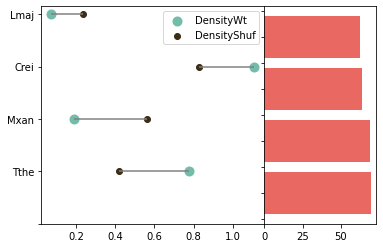

In [5]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfCas[dfCas.Class == 'Global'])
fig, axs = plt.subplots(1, 2, sharex='col',
            gridspec_kw={'hspace': 0, 'wspace': 0, 'width_ratios' : [2,1]})
(ax1, ax2)= axs 

my_range=range(1,len(dfTmp.index)+1)
ax1.hlines(y=my_range, xmin=dfTmp['DensityWt'], xmax=dfTmp['DensityShuf'], color='grey')
ax1.scatter(dfTmp['DensityWt'], my_range, color='#73BCAA', label='DensityWt', linewidth=4)
ax1.scatter(dfTmp['DensityShuf'], my_range, color='#3C2D16', label='DensityShuf')
y = np.arange(len(dfTmp['ShortName'])+1)
yLabels = ['']
yLabels.extend( list(dfTmp['ShortName']) )
ax1.set_yticks(y)
ax1.set_yticklabels(yLabels, fontdict=None, minor=False)
ax1.legend()
y_pos = np.arange(len(dfTmp['ShortName']))
ax2.barh(y_pos, dfTmp['GC'], color='#E64E46', alpha=0.85)
for ax in axs.flat:
    ax.label_outer()

plt.show()

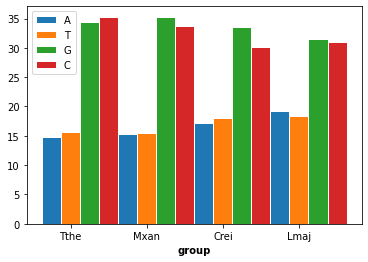

In [6]:
dfTmp['A'] = dfTmp['nuclA']/dfTmp['Tot']*100
dfTmp['T'] = dfTmp['nuclT']/dfTmp['Tot']*100
dfTmp['G'] = dfTmp['nuclG']/dfTmp['Tot']*100
dfTmp['C'] = dfTmp['nuclC']/dfTmp['Tot']*100

# Set position of bar on X axis
barWidth = 0.25
r1 = np.arange(len(dfTmp['A']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, dfTmp['A'], width=barWidth, edgecolor='white', label='A')
plt.bar(r2, dfTmp['T'], width=barWidth, edgecolor='white', label='T')
plt.bar(r3, dfTmp['G'], width=barWidth, edgecolor='white', label='G')
plt.bar(r4, dfTmp['C'], width=barWidth, edgecolor='white', label='C')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(dfTmp['A']))], dfTmp['ShortName'])
# Create legend & Show graphic
plt.legend()
plt.show()

# Bactéries
## contenu nucléotides pG4

In [79]:
dicoNt1 = readSeq('/home/anais/Documents/Projet/G4Conservation/data/myxococcus_xanthus_dk_1622/pG4WT.csv')
pprint(dicoNt)
dicoNt2 = readSeq('/home/anais/Documents/Projet/G4Conservation/data/thermus_thermophilus_hb8/pG4WT.csv')
pprint(dicoNt)

{'A': {'A': 21747,
       'AA': 4055,
       'AAA': 503,
       'AAAA': 107,
       'AAAAA': 17,
       'AAAAAA': 2},
 'C': {'C': 26234, 'CC': 10587, 'CCC': 1787, 'CCCC': 100},
 'G': {'G': 17805,
       'GG': 18481,
       'GGG': 6562,
       'GGGG': 4790,
       'GGGGG': 3179,
       'GGGGGG': 1135,
       'GGGGGGG': 478,
       'GGGGGGGG': 110,
       'GGGGGGGGG': 6,
       'GGGGGGGGGG': 3,
       'GGGGGGGGGGG': 1},
 'T': {'T': 23554, 'TT': 3870, 'TTT': 760, 'TTTT': 198, 'TTTTT': 12}}
{'A': {'A': 21747,
       'AA': 4055,
       'AAA': 503,
       'AAAA': 107,
       'AAAAA': 17,
       'AAAAAA': 2},
 'C': {'C': 26234, 'CC': 10587, 'CCC': 1787, 'CCCC': 100},
 'G': {'G': 17805,
       'GG': 18481,
       'GGG': 6562,
       'GGGG': 4790,
       'GGGGG': 3179,
       'GGGGGG': 1135,
       'GGGGGGG': 478,
       'GGGGGGGG': 110,
       'GGGGGGGGG': 6,
       'GGGGGGGGGG': 3,
       'GGGGGGGGGGG': 1},
 'T': {'T': 23554, 'TT': 3870, 'TTT': 760, 'TTTT': 198, 'TTTTT': 12}}


G


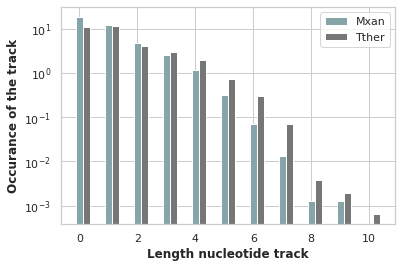

-------
C


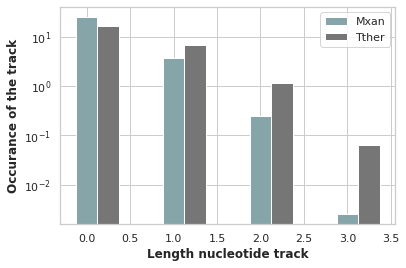

-------
T


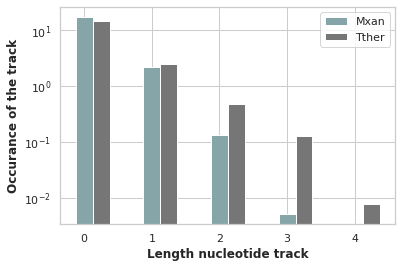

-------
A


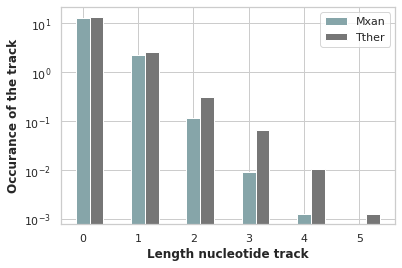

-------


In [18]:
dico = [dicoNt1, dicoNt2]
maxTrack = {}
for nucl in dico[1]:
    if nucl not in maxTrack:
        maxTrack[nucl] = 0
    for track in dico[0][nucl]:
        if len(track) > maxTrack[nucl]:
            maxTrack[nucl] = len(track)
    for track in dico[1][nucl]:
        if len(track) > maxTrack[nucl]:
            maxTrack[nucl] = len(track)
# print(maxTrack)

barsMxan = {}
barsTthe = {}
for nucl in maxTrack:
    barsMxan[nucl] = [0] * maxTrack[nucl]
for nucl in maxTrack:
    barsTthe[nucl] = [0] * maxTrack[nucl]

for nucl in dico[0]:
    for track in dico[0][nucl]:
        barsMxan[nucl][len(track)-1] = dico[0][nucl][track]
    for track in dico[1][nucl]:
        barsTthe[nucl][len(track)-1] = dico[1][nucl][track]

for nt in barsTthe:
    print(nt)
    sns.set(style="whitegrid")
    # set width of bar
    barWidth = 0.25
    barMxan = [i/1604.0 for i in barsMxan[nt]]
    barTthe = [i/(1583.0) for i in barsTthe[nt]]
        
    # Set position of bar on X axis
    r1 = np.arange(len(barMxan))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, barMxan, color='#86a5a9', width=barWidth, edgecolor='white', label='Mxan')
    plt.bar(r2, barTthe, color='#767676', width=barWidth, edgecolor='white', label='Tther')

    # Add xticks on the middle of the group bars
    plt.yscale('log')
    plt.xlabel('Length nucleotide track', fontweight='bold')
    plt.ylabel('Occurance of the track', fontweight='bold')

    # Create legend & Show graphic
    plt.legend()
    plt.show()
    print('-------')

7578
8404922


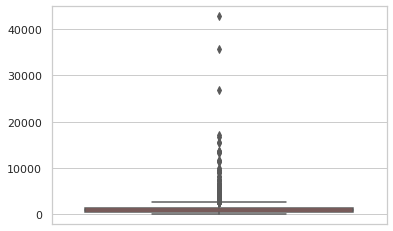

{'A': {'A': 902212,
       'AA': 175986,
       'AAA': 10298,
       'AAAA': 1431,
       'AAAAA': 194,
       'AAAAAA': 34,
       'AAAAAAA': 9,
       'AAAAAAAA': 2},
 'C': {'C': 1437576,
       'CC': 459805,
       'CCC': 110505,
       'CCCC': 27710,
       'CCCCC': 6378,
       'CCCCCC': 1158,
       'CCCCCCC': 144,
       'CCCCCCCC': 26,
       'CCCCCCCCC': 6,
       'CCCCCCCCCC': 2},
 'G': {'G': 1346514,
       'GG': 541234,
       'GGG': 126392,
       'GGGG': 28288,
       'GGGGG': 7349,
       'GGGGGG': 1331,
       'GGGGGGG': 192,
       'GGGGGGGG': 26,
       'GGGGGGGGG': 3,
       'GGGGGGGGGG': 3,
       'GGGGGGGGGGG': 1},
 'T': {'T': 962929,
       'TT': 152284,
       'TTT': 10603,
       'TTTT': 1275,
       'TTTTT': 184,
       'TTTTTT': 28,
       'TTTTTTT': 5,
       'TTTTTTTT': 1}}
2434
2041461


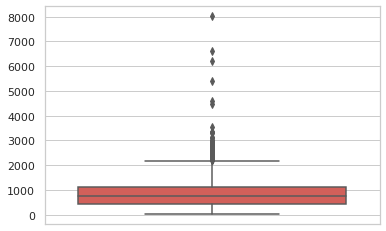

{'A': {'A': 198371,
       'AA': 40037,
       'AAA': 4725,
       'AAAA': 1695,
       'AAAAA': 295,
       'AAAAAA': 30,
       'AAAAAAA': 5,
       'AAAAAAAAA': 1},
 'C': {'C': 215758,
       'CC': 130563,
       'CCC': 43467,
       'CCCC': 16563,
       'CCCCC': 6244,
       'CCCCCC': 1620,
       'CCCCCCC': 465,
       'CCCCCCCC': 68,
       'CCCCCCCCC': 1},
 'G': {'G': 192540,
       'GG': 132941,
       'GGG': 37910,
       'GGGG': 18056,
       'GGGGG': 7973,
       'GGGGGG': 2110,
       'GGGGGGG': 717,
       'GGGGGGGG': 104,
       'GGGGGGGGG': 5,
       'GGGGGGGGGG': 1},
 'T': {'T': 210102,
       'TT': 37983,
       'TTT': 7617,
       'TTTT': 2075,
       'TTTTT': 373,
       'TTTTTT': 28,
       'TTTTTTT': 2}}


In [15]:
dicoMxan = readGeneSeq('/home/anais/Documents/Projet/G4Conservation/data/myxococcus_xanthus_dk_1622/Sequences_Gene_WT.fa')
pprint(dicoMxan)#110
dicoTthe = readGeneSeq('/home/anais/Documents/Projet/G4Conservation/data/thermus_thermophilus_hb8/Sequences_Gene_WT.fa')
pprint(dicoTthe)#838

## contenu nucléotides GENES

G


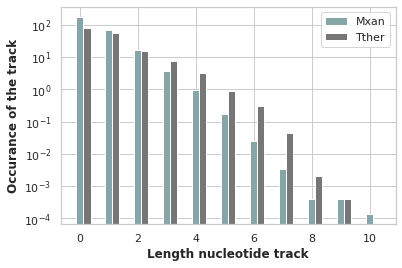

-------
C


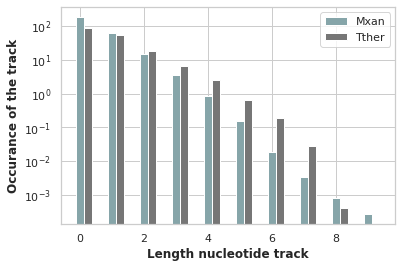

-------
T


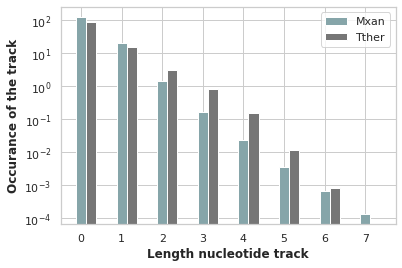

-------
A


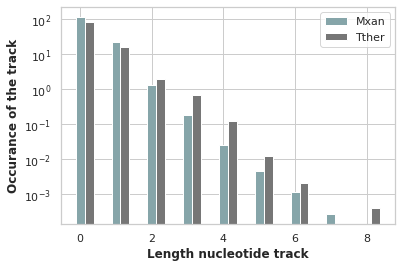

-------


In [9]:
dico = [dicoMxan, dicoTthe]
maxTrack = {}
for nucl in dico[1]:
    if nucl not in maxTrack:
        maxTrack[nucl] = 0
    for track in dico[0][nucl]:
        if len(track) > maxTrack[nucl]:
            maxTrack[nucl] = len(track)
    for track in dico[1][nucl]:
        if len(track) > maxTrack[nucl]:
            maxTrack[nucl] = len(track)
# print(maxTrack)

barsMxan = {}
barsTthe = {}
for nucl in maxTrack:
    barsMxan[nucl] = [0] * maxTrack[nucl]
for nucl in maxTrack:
    barsTthe[nucl] = [0] * maxTrack[nucl]

for nucl in dico[0]:
    for track in dico[0][nucl]:
        barsMxan[nucl][len(track)-1] = dico[0][nucl][track]
    for track in dico[1][nucl]:
        barsTthe[nucl][len(track)-1] = dico[1][nucl][track]

for nt in barsTthe:
    print(nt)
    sns.set(style="whitegrid")
    # set width of bar
    barWidth = 0.25
    barMxan = [i/7578.0 for i in barsMxan[nt]]
    barTthe = [i/(2434.0) for i in barsTthe[nt]]
        
    # Set position of bar on X axis
    r1 = np.arange(len(barMxan))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, barMxan, color='#86a5a9', width=barWidth, edgecolor='white', label='Mxan')
    plt.bar(r2, barTthe, color='#767676', width=barWidth, edgecolor='white', label='Tther')

    # Add xticks on the middle of the group bars
    plt.yscale('log')
    plt.xlabel('Length nucleotide track', fontweight='bold')
    plt.ylabel('Occurance of the track', fontweight='bold')

    # Create legend & Show graphic
    plt.legend()
    plt.show()
    print('-------')

G


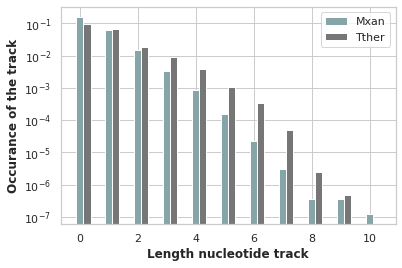

-------
C


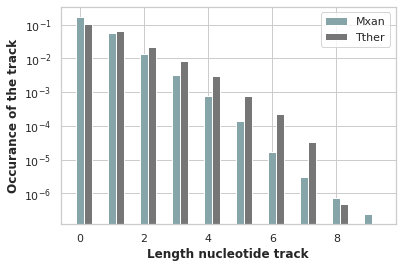

-------
T


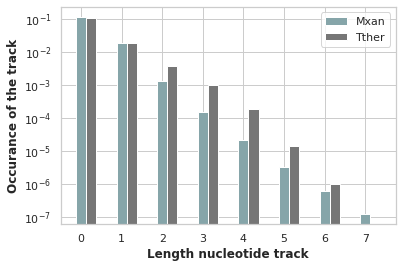

-------
A


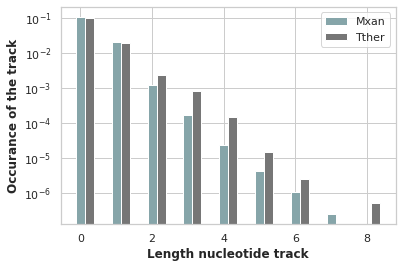

-------


In [16]:
dico = [dicoMxan, dicoTthe]
maxTrack = {}
for nucl in dico[1]:
    if nucl not in maxTrack:
        maxTrack[nucl] = 0
    for track in dico[0][nucl]:
        if len(track) > maxTrack[nucl]:
            maxTrack[nucl] = len(track)
    for track in dico[1][nucl]:
        if len(track) > maxTrack[nucl]:
            maxTrack[nucl] = len(track)
# print(maxTrack)

barsMxan = {}
barsTthe = {}
for nucl in maxTrack:
    barsMxan[nucl] = [0] * maxTrack[nucl]
for nucl in maxTrack:
    barsTthe[nucl] = [0] * maxTrack[nucl]

for nucl in dico[0]:
    for track in dico[0][nucl]:
        barsMxan[nucl][len(track)-1] = dico[0][nucl][track]
    for track in dico[1][nucl]:
        barsTthe[nucl][len(track)-1] = dico[1][nucl][track]

for nt in barsTthe:
    print(nt)
    sns.set(style="whitegrid")
    # set width of bar
    barWidth = 0.25
    barMxan = [i/8404922.0 for i in barsMxan[nt]]
    barTthe = [i/(2041461.0) for i in barsTthe[nt]]
        
    # Set position of bar on X axis
    r1 = np.arange(len(barMxan))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, barMxan, color='#86a5a9', width=barWidth, edgecolor='white', label='Mxan')
    plt.bar(r2, barTthe, color='#767676', width=barWidth, edgecolor='white', label='Tther')

    # Add xticks on the middle of the group bars
    plt.yscale('log')
    plt.xlabel('Length nucleotide track', fontweight='bold')
    plt.ylabel('Occurance of the track', fontweight='bold')

    # Create legend & Show graphic
    plt.legend()
    plt.show()
    print('-------')

## Get bedfile

In [121]:
fileContent = readGeneSeq2Bed('/home/anais/Documents/Projet/G4Conservation/data/myxococcus_xanthus_dk_1622/Sequences_Gene_WT.fa', "C")
# print(fileContent)
output = open('/home/anais/Documents/Projet/G4Conservation/data/myxococcus_xanthus_dk_1622/Ccontent.bedgraph', "w")
output.write('\n'.join(fileContent))
output.close()

fileContent = readGeneSeq2Bed('/home/anais/Documents/Projet/G4Conservation/data/myxococcus_xanthus_dk_1622/Sequences_Gene_WT.fa', "G")
# print(fileContent)
output = open('/home/anais/Documents/Projet/G4Conservation/data/myxococcus_xanthus_dk_1622/Gcontent.bedgraph', "w")
output.write('\n'.join(fileContent))
output.close()

fileContent = readGeneSeq2Bed('/home/anais/Documents/Projet/G4Conservation/data/thermus_thermophilus_hb8/Sequences_Gene_WT.fa', "C")
# print(fileContent)
output = open('/home/anais/Documents/Projet/G4Conservation/data/thermus_thermophilus_hb8/Ccontent.bedgraph', "w")
output.write('\n'.join(fileContent))
output.close()

fileContent = readGeneSeq2Bed('/home/anais/Documents/Projet/G4Conservation/data/thermus_thermophilus_hb8/Sequences_Gene_WT.fa', "G")
# print(fileContent)
output = open('/home/anais/Documents/Projet/G4Conservation/data/thermus_thermophilus_hb8/Gcontent.bedgraph', "w")
output.write('\n'.join(fileContent))
output.close()

## DF next content

In [33]:
def readGeneSeq2Df(filename, nucl, lenMatch):
    dfTmp = pd.DataFrame()
    length = []
    fileContent = []
    fastaOrigin = SeqIO.parse(open(filename),'fasta')
    for fasta in fastaOrigin:
        name, seq = fasta.id, str(fasta.seq)
        strd = name.split(':')[-1]
        chr = name.split(':')[2]
        gene = name.split(':')[0]
        geneCoord = name.split(':')[-2]
        geneStart = int(geneCoord.split('~')[0])
        geneEnd = int(geneCoord.split('~')[1])
        seq = seq.upper()
        length.append(len(seq))
        p = re.compile("("+nucl+"{"+lenMatch+",})")
        for m in p.finditer(seq):
            start = m.start()+ geneStart
            end = m.end() + geneStart -1
            match = m.group()
            row = {'chr': [chr], 'start': [start], 'end': [end], 'len': len(match),
                    'type': nucl, 'gene': gene, 'lenGene': [geneEnd - geneStart +1]}
            dfTmp = dfTmp.append(pd.DataFrame.from_dict(row))
    return dfTmp

In [38]:
dfConsNuclMxan = pd.DataFrame()
dfConsNuclMxan = dfConsNuclMxan.append(readGeneSeq2Df('/home/anais/Documents/Projet/G4Conservation/data/myxococcus_xanthus_dk_1622/Sequences_Gene_WT.fa', "C", "4"))
dfConsNuclMxan = dfConsNuclMxan.append(readGeneSeq2Df('/home/anais/Documents/Projet/G4Conservation/data/myxococcus_xanthus_dk_1622/Sequences_Gene_WT.fa', "G", "4"))
dfConsNuclMxan = dfConsNuclMxan.sort_values("start")
dfConsNuclMxan = dfConsNuclMxan.reset_index()
dfConsNuclMxan.head()

,index,chr,start,end,len,type,gene,lenGene
0,0,Chromosome,1540,1544,5,G,MXAN_0002,1902
1,0,Chromosome,1725,1728,4,G,MXAN_0002,1902
2,0,Chromosome,1976,1979,4,G,MXAN_0002,1902
3,0,Chromosome,2018,2021,4,G,MXAN_0002,1902
4,0,Chromosome,2121,2125,5,C,MXAN_0002,1902


In [40]:
dicoRes = {'Previous' : {'G' : 0, 'C': 0},
          'Next': {'G' : 0, 'C': 0}}
tot = 0
for index, row in dfConsNuclMxan.iterrows():
    tot += 1
    if index != 0:
        dicoRes['Previous'][dfConsNuclMxan.type.iloc[index-1]] += 1
    if index != len(dfConsNuclMxan)-1:
        dicoRes['Next'][dfConsNuclMxan.type.iloc[index+1]] += 1
pprint(dicoRes)
print(tot)

{'Next': {'C': 35424, 'G': 37192}, 'Previous': {'C': 35423, 'G': 37193}}
72617


In [41]:
dicoRes = {'G2C' : [], 'G2G' : [], 'C2G' : [], 'C2C': []}
for index, row in dfConsNuclMxan.iterrows():
    if index != len(dfConsNuclMxan)-1:
        if dfConsNuclMxan.chr.iloc[index+1] == dfConsNuclMxan.chr.iloc[index] and\
            dfConsNuclMxan.gene.iloc[index+1] == dfConsNuclMxan.gene.iloc[index]:
            current = dfConsNuclMxan.type.iloc[index]
            nextOne = dfConsNuclMxan.type.iloc[index+1]
            type = current+'2'+nextOne
            dicoRes[type].append((dfConsNuclMxan.start.iloc[index+1] - dfConsNuclMxan.end.iloc[index])/float(row.lenGene))
dicoMean = {}
for i in dicoRes:
    dicoMean[i] = sum(dicoRes[i]) / float(len(dicoRes[i]))
pprint(dicoMean)

{'C2C': 0.0761982460383262,
 'C2G': 0.07626557850902387,
 'G2C': 0.07809367782419924,
 'G2G': 0.07115247237708369}


In [34]:
dfConsNucl = pd.DataFrame()
dfConsNucl = dfConsNucl.append(readGeneSeq2Df('/home/anais/Documents/Projet/G4Conservation/data/thermus_thermophilus_hb8/Sequences_Gene_WT.fa', "C", "4"))
dfConsNucl = dfConsNucl.append(readGeneSeq2Df('/home/anais/Documents/Projet/G4Conservation/data/thermus_thermophilus_hb8/Sequences_Gene_WT.fa', "G", "4"))
dfConsNucl = dfConsNucl.sort_values("start")
dfConsNucl = dfConsNucl.reset_index()
dfConsNucl.head()

,index,chr,start,end,len,type,gene,lenGene
0,0,pTT27,68,71,4,G,BAD71797,300
1,0,pTT27,100,103,4,G,BAD71797,300
2,0,pTT27,126,129,4,G,BAD71797,300
3,0,pTT27,131,135,5,G,BAD71797,300
4,0,pTT8,156,159,4,C,BAD72048,1164


In [35]:
dicoRes = {'Previous' : {'G' : 0, 'C': 0},
          'Next': {'G' : 0, 'C': 0}}
tot = 0
for index, row in dfConsNucl.iterrows():
    tot += 1
    if index != 0:
        dicoRes['Previous'][dfConsNucl.type.iloc[index-1]] += 1
    if index != len(dfConsNucl)-1:
        dicoRes['Next'][dfConsNucl.type.iloc[index+1]] += 1
pprint(dicoRes)
print(tot)

{'Next': {'C': 24961, 'G': 28965}, 'Previous': {'C': 24960, 'G': 28966}}
53927


In [36]:
dicoRes = {'G2C' : [], 'G2G' : [], 'C2G' : [], 'C2C': []}
for index, row in dfConsNucl.iterrows():
    if index != len(dfConsNucl)-1:
        if dfConsNucl.chr.iloc[index+1] == dfConsNucl.chr.iloc[index] and\
            dfConsNucl.gene.iloc[index+1] == dfConsNucl.gene.iloc[index]:
            current = dfConsNucl.type.iloc[index]
            nextOne = dfConsNucl.type.iloc[index+1]
            type = current+'2'+nextOne
            dicoRes[type].append((dfConsNucl.start.iloc[index+1] - dfConsNucl.end.iloc[index])/float(row.lenGene))
dicoMean = {}
for i in dicoRes:
    dicoMean[i] = sum(dicoRes[i]) / float(len(dicoRes[i]))
pprint(dicoMean)

{'C2C': 0.02910785282202792,
 'C2G': 0.03093728832137126,
 'G2C': 0.033262581122248294,
 'G2G': 0.03174105570911181}


## GC Skewness

In [27]:
def getDistriNuclGene(filename, nucl):
    dfTmp = pd.DataFrame()
    length = []
    fileContent = []
    fastaOrigin = SeqIO.parse(open(filename),'fasta')
    colPosition = []
    colRelPosition = []
    collenGene = []
    for fasta in fastaOrigin:
        name, seq = fasta.id, str(fasta.seq)
        geneCoord = name.split(':')[-2]
        geneStart = int(geneCoord.split('~')[0])
        geneEnd = int(geneCoord.split('~')[1])
        seq = seq.upper()
        length.append(len(seq))
        p = re.compile(nucl)
        for m in p.finditer(seq):
            match = m.group()
            start = m.start()
            match = m.group()
            colPosition.append(start)
            colRelPosition.append(start/float(geneEnd - geneStart +1))
    dfTmp = dfTmp.append(pd.DataFrame.from_dict( {'Position': colPosition, 'relPosition': colRelPosition} ))
    return dfTmp

### Tthe

In [28]:
dfGDistriTthe = pd.DataFrame()
dfGDistriTthe = dfGDistriTthe.append(getDistriNuclGene('/home/anais/Documents/Projet/G4Conservation/data/thermus_thermophilus_hb8/Sequences_Gene_WT.fa', "G"))
dfGDistriTthe = dfGDistriTthe.sort_values("relPosition")
dfGDistriTthe = dfGDistriTthe.reset_index()
dfGDistriTthe.head()

,index,Position,relPosition
0,238919,0,0.0
1,109942,0,0.0
2,110991,0,0.0
3,642788,0,0.0
4,35137,0,0.0


In [29]:
dfCDistriTthe = pd.DataFrame()
dfCDistriTthe = dfCDistriTthe.append(getDistriNuclGene('/home/anais/Documents/Projet/G4Conservation/data/thermus_thermophilus_hb8/Sequences_Gene_WT.fa', "C"))
dfCDistriTthe = dfCDistriTthe.sort_values("relPosition")
dfCDistriTthe = dfCDistriTthe.reset_index()
dfCDistriTthe.head()

,index,Position,relPosition
0,166331,0,0.0
1,692101,0,0.0
2,483931,0,0.0
3,87686,0,0.0
4,388028,0,0.0


/home/anais/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


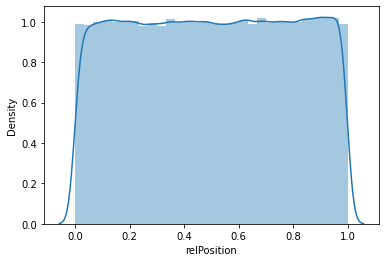

/home/anais/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


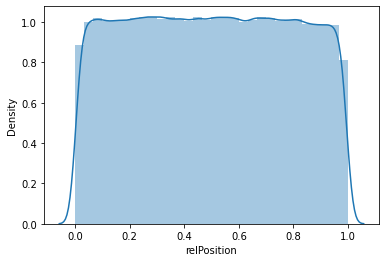

In [30]:
sns.distplot( dfGDistriTthe["relPosition"], bins=30 )
plt.show()
sns.distplot( dfCDistriTthe["relPosition"], bins=30 )
plt.show()

In [34]:
skew(dfGDistriTthe["relPosition"])

-0.0066221598556395955

In [35]:
skew(dfCDistriTthe["relPosition"])

0.005720065007100304

### Mxan

In [31]:
dfGDistriMxan = pd.DataFrame()
dfGDistriMxan = dfGDistriMxan.append(getDistriNuclGene('/home/anais/Documents/Projet/G4Conservation/data/myxococcus_xanthus_dk_1622/Sequences_Gene_WT.fa', "G"))
dfGDistriMxan = dfGDistriMxan.sort_values("relPosition")
dfGDistriMxan = dfGDistriMxan.reset_index()
dfGDistriMxan.head()

,index,Position,relPosition
0,683633,0,0.0
1,781701,0,0.0
2,1909695,0,0.0
3,1909344,0,0.0
4,783589,0,0.0


In [32]:
dfCDistriMxan = pd.DataFrame()
dfCDistriMxan = dfCDistriMxan.append(getDistriNuclGene('/home/anais/Documents/Projet/G4Conservation/data/myxococcus_xanthus_dk_1622/Sequences_Gene_WT.fa', "C"))
dfCDistriMxan = dfCDistriMxan.sort_values("relPosition")
dfCDistriMxan = dfCDistriMxan.reset_index()
dfCDistriMxan.head()

,index,Position,relPosition
0,1807910,0,0.0
1,1662041,0,0.0
2,697245,0,0.0
3,554755,0,0.0
4,1867150,0,0.0


/home/anais/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


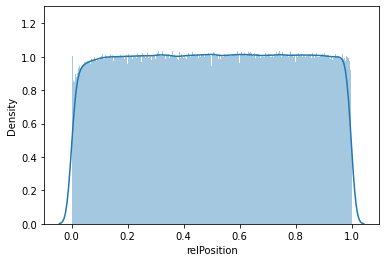

/home/anais/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


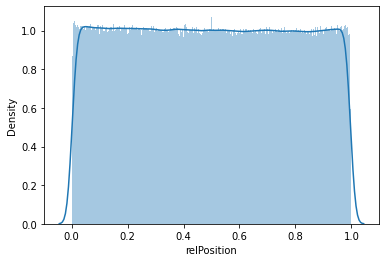

In [33]:
sns.distplot( dfGDistriMxan["relPosition"], bins=500 )
plt.show()
sns.distplot( dfCDistriMxan["relPosition"], bins=500 )
plt.show()

In [40]:
skew(dfGDistriMxan["relPosition"])

-0.006021237497719172

In [41]:
skew(dfCDistriMxan["relPosition"])

0.006845447430201682

## GC skewness windows

In [58]:
def readCSVFiles(dirName):
    dfNegativeWin = pd.DataFrame()
    dfPositiveWin = pd.DataFrame()
    for path, dirs, files in os.walk(dirName):
        for filename in files:
            inputfile = dirName + '/' + filename
            if ('Sequences_Gene_WT' in filename):
                dfWindows = pd.read_csv(inputfile, sep='\t', index_col=0)
                dfWindows.columns = ['geneDesc','cGcC', 'G4H','seqG4','wStart', 'wEnd', 'G4NN']
                
                dfPositiveWind = pd.DataFrame()
                dfPositiveWind = dfPositiveWind.append(dfWindows)
                dfPositiveWind = dfPositiveWind[ dfWindows.cGcC >= 4.5 ].dropna()
                dfPositiveWind = dfPositiveWind[ dfWindows.G4H >= 0.9 ].dropna()
                dfPositiveWind = dfPositiveWind[ dfWindows.G4NN >= 0.5 ].dropna()
                dfPositiveWin = dfPositiveWin .append(dfPositiveWind)
                
                common = dfWindows.merge(dfPositiveWind,on=['geneDesc','cGcC', 'G4H','seqG4','wStart', 'wEnd', 'G4NN'])
                dfNegativeWin = dfNegativeWin.append(dfWindows[(~dfWindows.geneDesc.isin(common.geneDesc))&(~dfWindows.cGcC.isin(common.cGcC))&(~dfWindows.G4H.isin(common.G4H))&(~dfWindows.seqG4.isin(common.seqG4))&(~dfWindows.wStart.isin(common.wStart))&(~dfWindows.wEnd.isin(common.wEnd))&(~dfWindows.G4NN.isin(common.G4NN))])
                del(common)
                del(dfPositiveWind)
                del(dfWindows)
                
    listSeqPos = dfPositiveWin.seqG4
    listSeqNeg = dfNegativeWin.seqG4
    return(listSeqPos, listSeqNeg)

def getDistriNuclGene(listSeq, nucl):
    colPosition = []
    for seq in listSeq:
        seq = seq.upper()
        p = re.compile(nucl)
        for m in p.finditer(seq):
            match = m.group()
            start = m.start()
            match = m.group()
            colPosition.append(start)
    return colPosition
                

### Mxan

In [39]:
listPos, listNeg = readCSVFiles('/home/anais/Documents/Projet/G4Conservation/data/myxococcus_xanthus_dk_1622/CSVFile/')
skew(getDistriNuclGene(listPos, 'G'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


0.007308492496028126

In [40]:
skew(getDistriNuclGene(listPos, 'C'))

-0.014109652155589292

In [41]:
skew(getDistriNuclGene(listNeg, 'G'))

0.002933580253942058

In [42]:
skew(getDistriNuclGene(listNeg, 'C'))

-0.0009538690926411535

### Tthe

In [45]:
listPos, listNeg = readCSVFiles('/home/anais/Documents/Projet/G4Conservation/data/thermus_thermophilus_hb8/CSVFile/')
skew(getDistriNuclGene(listPos, 'G'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


0.006005409686562859

In [46]:
skew(getDistriNuclGene(listPos, 'C'))

0.008757087503173508

In [47]:
skew(getDistriNuclGene(listNeg, 'G'))

0.012890596217249323

In [48]:
skew(getDistriNuclGene(listNeg, 'C'))

-0.008989395275311143

## Windows GC content

In [54]:
def readCSVFiles(dirName):
    dfNegativeWin = pd.DataFrame()
    dfPositiveWin = pd.DataFrame()
    for path, dirs, files in os.walk(dirName):
        for filename in files:
            inputfile = dirName + '/' + filename
            if ('Sequences_Gene_WT' in filename):
                dfWindows = pd.read_csv(inputfile, sep='\t', index_col=0)
                dfWindows.columns = ['geneDesc','cGcC', 'G4H','seqG4','wStart', 'wEnd', 'G4NN']
                
                dfPositiveWind = pd.DataFrame()
                dfPositiveWind = dfPositiveWind.append(dfWindows)
                dfPositiveWind = dfPositiveWind[ dfWindows.cGcC >= 4.5 ].dropna()
                dfPositiveWind = dfPositiveWind[ dfWindows.G4H >= 0.9 ].dropna()
                dfPositiveWind = dfPositiveWind[ dfWindows.G4NN >= 0.5 ].dropna()
                dfPositiveWin = dfPositiveWin .append(dfPositiveWind)
                
                common = dfWindows.merge(dfPositiveWind,on=['geneDesc','cGcC', 'G4H','seqG4','wStart', 'wEnd', 'G4NN'])
                dfNegativeWin = dfNegativeWin.append(dfWindows[(~dfWindows.geneDesc.isin(common.geneDesc))&(~dfWindows.cGcC.isin(common.cGcC))&(~dfWindows.G4H.isin(common.G4H))&(~dfWindows.seqG4.isin(common.seqG4))&(~dfWindows.wStart.isin(common.wStart))&(~dfWindows.wEnd.isin(common.wEnd))&(~dfWindows.G4NN.isin(common.G4NN))])
                del(common)
                del(dfPositiveWind)
                del(dfWindows)
                
    listSeqPos = dfPositiveWin.seqG4
    listSeqNeg = dfNegativeWin.seqG4
    PosG = 0
    PosC = 0
    for seq in listSeqPos:
        PosG += seq.count('G')
        PosC += seq.count('C')
    PosG = PosG/float(len(listSeqPos))
    PosC = PosC/float(len(listSeqPos))
    NegG = 0
    NegC = 0
    for seq in listSeqNeg:
        NegG += seq.count('G')
        NegC += seq.count('C')
    NegG = NegG/float(len(listSeqNeg))
    NegC = NegC/float(len(listSeqNeg))
    print(PosG, PosC, len(listSeqPos))
    print(NegG, NegC, len(listSeqNeg))
                

In [23]:
readCSVFiles('/home/anais/Documents/Projet/G4Conservation/data/myxococcus_xanthus_dk_1622/CSVFile/')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


31.303101920236337 12.924667651403249 3385
20.789346246973366 20.944163181451316 27258


In [24]:
readCSVFiles('/home/anais/Documents/Projet/G4Conservation/data/thermus_thermophilus_hb8/CSVFile/')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


31.200977573318 12.52673950546291 3478
19.21951219512195 21.73693379790941 1148


In [55]:
readCSVFiles('/home/anais/Documents/Projet/G4Conservation/data/mycobacterium_tuberculosis_h37rv/CSVFile/')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


31.71978021978022 13.38034188034188 1638
19.638454140071698 19.952435079129142 11437


### Lmaj et Crei

In [56]:
readCSVFiles('/home/anais/Documents/Projet/G4Conservation/data/leishmania_major/CSVFile/')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3

30.82631160572337 10.982511923688394 2516
18.9949651735217 18.88100302971701 294747


In [57]:
readCSVFiles('/home/anais/Documents/Projet/G4Conservation/data/chlamydomonas_reinhardtii/CSVFile/')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3

33.33043073380515 9.333192238664454 590620
16.431578947368422 19.872180451127818 665


## Scores

In [30]:
dfMxan = pd.read_csv('/home/anais/Documents/Projet/G4Conservation/data/myxococcus_xanthus_dk_1622/CSVFile/Sequences_Gene_WT_00001.csv', sep='\t')
listG4NN = [list(dfMxan.G4NN)]
listcGcC = [list(dfMxan.cGcC)]
listG4H = [list(dfMxan.G4H)]
dfMxan = pd.read_csv('/home/anais/Documents/Projet/G4Conservation/data/myxococcus_xanthus_dk_1622/CSVFile/Sequences_Gene_WT_00002.csv', sep='\t')
listG4NN[0].extend(list(dfMxan.G4NN))
listcGcC[0].extend(list(dfMxan.cGcC))
listG4H[0].extend(list(dfMxan.G4H))
dfTthe = pd.read_csv('/home/anais/Documents/Projet/G4Conservation/data/thermus_thermophilus_hb8/CSVFile/Sequences_Gene_WT_00001.csv', sep='\t')
listG4NN.append(list(dfMxan.dfTthe))
listcGcC.append(list(dfMxan.dfTthe))
listG4H.append(list(dfMxan.dfTthe))

### G4NN

<AxesSubplot:>

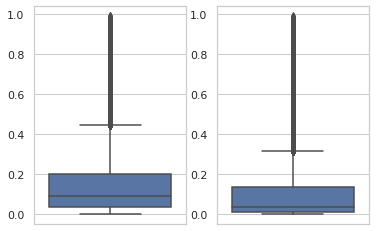

In [31]:
plt.subplot(1, 2, 1)
sns.boxplot( y=listG4NN[0] )
plt.subplot(1, 2, 2)
sns.boxplot( y=listG4NN[1] )

### cGcC

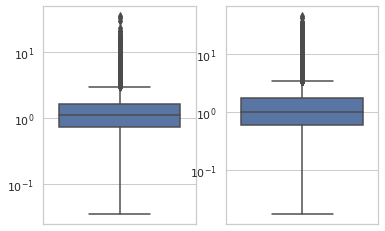

In [37]:
plt.subplot(1, 2, 1)
sns.boxplot( y=listcGcC[0] )
plt.yscale('log')
plt.subplot(1, 2, 2)
sns.boxplot( y=listcGcC[1] )
plt.yscale('log')

### G4H

<AxesSubplot:>

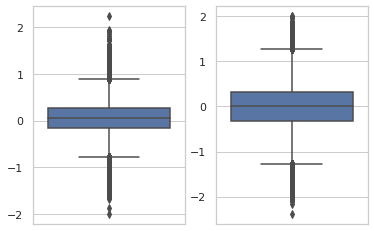

In [35]:
plt.subplot(1, 2, 1)
sns.boxplot( y=listG4H[0] )
plt.subplot(1, 2, 2)
sns.boxplot( y=listG4H[1] )

### test stat

In [66]:
def AllTest(a,b,alpha, name1, name2):
    if len(a) >= 3 and len(b) >= 3:
        shapA = scipy.stats.shapiro(a)
        shapB = scipy.stats.shapiro(b)

        if shapA[1] > alpha and shapB[1] > alpha:
            print("\tFisher test")
            f = f_test(a, b)
            if f[1] > alpha:
                print("\tt test")
                tTest =scipy.stats.ttest_ind(a,b)
                if tTest[1] <= alpha:
                    print("Means are significatly different")
                else:
                    print("Means are not differents")
                return(tTest)
            else:
                print("\twelch test")
                welch = scipy.stats.ttest_ind(a,b, equal_var=False)
                if welch[1] <= alpha:
                    print("Means are significatly different")
                else:
                    print("Means are not differents")
                return(welch)
        else:
            print("\tmannwhitneyu test")
            man = scipy.stats.mannwhitneyu(a,b)
            if man[1] <= alpha:
                print("Means are significatly different")
            else:
                print("Means are not differents")
            return(man)
    else:
        print('There are only 3 data for '+name1+' of '+name2+' transcripts.')
        return []

AllTest(listG4H[0],listG4H[1], 0.05, 'Mxan', 'Tthe')
AllTest(listG4NN[0],listG4NN[1], 0.05, 'Mxan', 'Tthe')
AllTest(listcGcC[0],listcGcC[1], 0.05, 'Mxan', 'Tthe')

	mannwhitneyu test
Means are significatly different
	mannwhitneyu test
Means are significatly different
	mannwhitneyu test
Means are significatly different
MannwhitneyuResult(statistic=73539956634.5, pvalue=0.0)


## contenu successif nt

7578
8404922


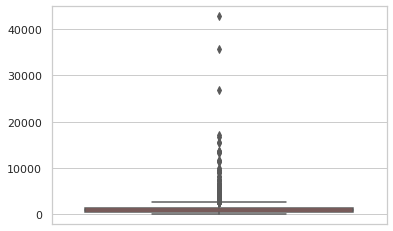

2434
2041461


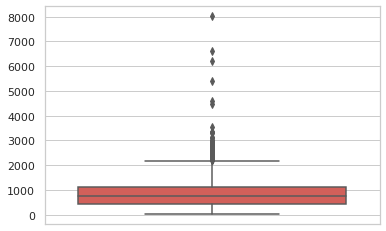

In [67]:
dicoMxan = readGeneSeq('/home/anais/Documents/Projet/G4Conservation/data/myxococcus_xanthus_dk_1622/Sequences_Gene_WT.fa', 'multplenucl')
# pprint(dicoMxan)
dicoTthe = readGeneSeq('/home/anais/Documents/Projet/G4Conservation/data/thermus_thermophilus_hb8/Sequences_Gene_WT.fa', 'multplenucl')
# pprint(dicoTthe)

In [75]:
dicoNbCnext4G = {}
dicoNbGnext4G = {}
for i in dicoMxan:
    listTrack = re.findall("(G{4,})", i)
    listTrack = list(filter(None, listTrack))
    if listTrack:
        nbG = seq.count('G')
        nbC = seq.count('C')
        if nbC not in dicoNbCnext4G:
            dicoNbCnext4G[nbC] = 0
        if nbG not in dicoNbCnext4G:
            dicoNbGnext4G[nbG] = 0
        dicoNbCnext4G[nbC] += 1
        dicoNbGnext4G[nbG] += 1

GCGGGGG
GGGGCGGG
CCGGGGC
GCGGGGCCGGG
CGGGGC
GGGGGC
GCGCGGGG
CGCGGGGG
GGGGGCGC
CGGGGCGCGGCG
CCCGGCGCGCGGGGGGCGGCCGG
CCGGGG
CCGGGGCCC
GGCCGGGG
CGGGG
CGCGGGG
GGGGCG
GCGGGG
GCGCCGGGGCCGCG
GGGGCGC
GGCGCGGGGGG
GGGGC
GGGGCC
CGGGGG
GGGGCGGCCCCGCG
GCGCCGGGGC
GCCGCCCGGGG
CGGCGGGGG
CGGCCGGGGGCCCG
CCGGGGCC
GGGCCCGGGGGC
GGGGCCCGCC
CGGGGGC
CCGCCGGGG
GCGGGCCGCGGGG
CCGGGGCG
GGCGGGG
CGGCGGGGGG
CCGCCGGGGCC
GGGGGCG
GCGGGGCC
GGGGGCCCG
GCGGGGCGGCGC
CGGCCGGGGG
CGGGGCC
CGCCCGCGGGG
GGGGCGGC
CCCGGGGCGGCCGCG
CGGGGCG
GGGGCGCG
GCGGGGCG
GGGCCGGGGC
GCCCGCGGGGG
GCGCCGGGG
CGGGGGCGG
GGGGCGG
GGCGGGGCGC
GCCGGGGCG
GGGGCCGG
GGGGCGCGGGGC
GGGGCCCGG
GGGGCCC
GCCGGGG
GCCCGGGGGC
CCGGGGCGGGG
GGCGCGGGGCC
GCCCCCGGGG
GGGCCGGGGCGGC
GCGGGGGC
CCGGGGGC
GGGGCCGC
CCGGGGGGC
CCGCGGGG
CCCGGGG
GGCCGGGGG
GCCCGGGG
CGCCGGGG
CGCCGCGGGG
GCGCGGGGGGCGCGCGCGG
GCCGGCGGGGCCGG
CGGGGCGC
GGCGGGGCGCG
GCCGGGGCCGC
GGCGGGGC
GCGGCGGGGCGGGC
CCGGGGGCGC
CCGGGGGGG
GCGGCGGGG
GGGGCGCCGCGC
CGCCCCCGGCGGGGGCG
GGGCCGGGG
CGGCGGGGGCG
GGGGGGC
GCCGGGGGCCCG
GGGGGGCC
GGGGCGG

GGCCCGCCGGGGGCG
CGGGGCGGCCCCCG
GCGGCCGGGGGC
GGGGCCCCGGCG
GGGGCGCGGGCCC
CGCGGGGCGGCCCG
GCCCGGCCGGGGGGC
GCCCCCGGGGCCGGGC
GGGGCGCGCGCGGGGCG
CGGGGGCGCCG
GGCGGGGGGG
GGGGGCCGCGGCGG
GCGCCGGGGCCGGGGCCGC
GCGGGGCCGCC
GGGGGCGGCGCGCC
CGCCGCGCGGGGG
GCGGGGCGGCC
CGGGGGCGGGGCGCC
CCGCGGGGGCCGCGGCGC
CCCGCCGGGGGC
CCCCCGGGGCGG
CCCGGGGGCCCGGC
GGCGCGGCGGGGC
GCGGCCGCGGGGC
GCGGGGCCGCGCGC
CGGGGGGCCCCCCCGCGG
GGCGCGCGGCGCGGGG
CGGGGCCCGCGGGGG
GGGGGCCCCCGGGGG
CGGGGGCGCCGGCGCGCGCC
CGGCGGGGCGCCCC
GGGCCCCGCCGGGG
GGCCGCCCGGGGCC
GGGGCGCCGGCCCG
GCGGCGCGGGGGGCGC
GGGGGGGCCC
CCCCGGGGGGGGC
CGCCGCCGCGGGGCCCGGG
CCCGGGGCCCGCGG
CGGGGGGGGCGC
GCCGGGGCCGGGGG
GGCCGCCGGGGCGG
CCGCGGGCGGGG
GGGCGGCGCGGGGCCCG
GGGCGGCGCGGGG
GGGCGGGGGCCGGG
GGCCCGCGCGCGGGGCG
GGGGGCCGCGGCGGCC
GGGGCCGCCGCGC
GCGCGGGGGCGGC
CGGGGCGGGCGCGGCGG
GGCGGGGCCGCGC
CCCGGCGGGGG
CCGGGGCGGCCC
GCGGCCCGGGGCG
GGGGGCGCCCCG
GCGCCGGGCGGGGC
GGGGCGCCCGCCG
GGCGGGGGCGCGGGGG
GCGGGGGGCGCGGGC
CCGCCGCCCGGGG
CGCCGGGGGGCG
CGCGGGGGCCCGGGGGCCC
GCGGGCCCGGGGCG
CGCCGCCGCGGGG
GCGGGGCGCCG
GGCGGCC

# Eukaryotes
## Windows nucleotid content

In [62]:
def readwindowSeq(listSeq):
    length = []
    dico = {'G': {}, 'C': {}, 'T': {}, 'A': {}}
    for seq in listSeq:
        seq = seq.upper()
        length.append(len(seq))
        for nucl in dico:
            listNucl = re.findall("("+nucl+"{1,})", seq)
            listNucl = list(filter(None, listNucl))
            listNucl = Counter(listNucl)
            for item in listNucl:
                if item not in dico[nucl]:
                    dico[nucl][item] = 0
                dico[nucl][item] += listNucl[item]
    print(len(length))
    print(sum(length))
    sns.boxplot(y=length, color="#E64E46" )
    plt.show()
    return dico

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3

2516
150892


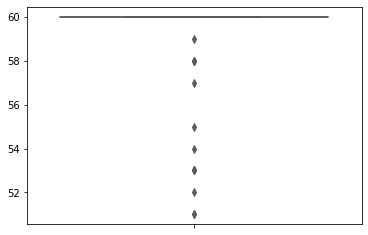

294747
17675213


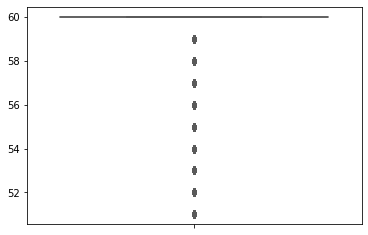

In [65]:
listPos, listNeg = readCSVFiles('/home/anais/Documents/Projet/G4Conservation/data/leishmania_major/CSVFile/')
dicoPosLmaj = readwindowSeq(listPos)
dicoNegLmaj = readwindowSeq(listNeg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3

590620
35435608


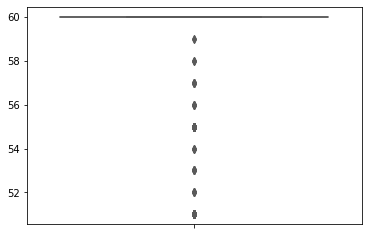

665
39889


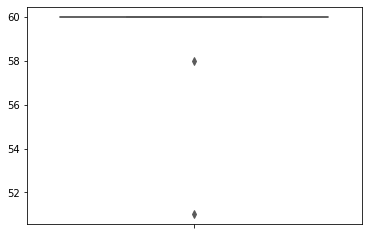

In [66]:
listPos, listNeg = readCSVFiles('/home/anais/Documents/Projet/G4Conservation/data/chlamydomonas_reinhardtii/CSVFile/')
dicoPosCrei = readwindowSeq(listPos)
dicoNegCrei = readwindowSeq(listNeg)

G


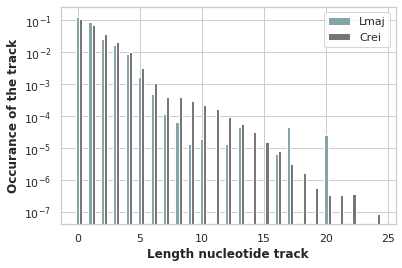

-------
C


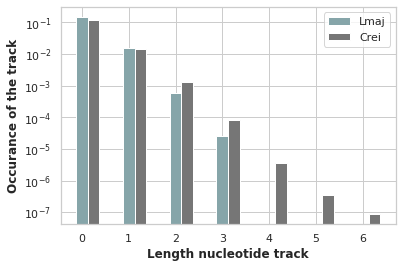

-------
T


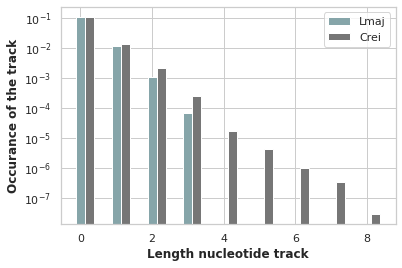

-------
A


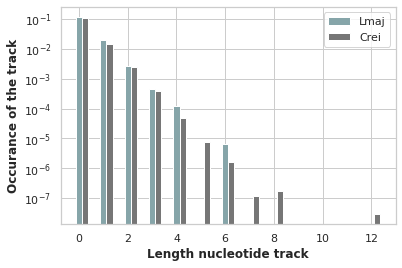

-------


In [71]:
dico = [dicoPosLmaj, dicoPosCrei]
maxTrack = {}
for nucl in dico[1]:
    if nucl not in maxTrack:
        maxTrack[nucl] = 0
    for track in dico[0][nucl]:
        if len(track) > maxTrack[nucl]:
            maxTrack[nucl] = len(track)
    for track in dico[1][nucl]:
        if len(track) > maxTrack[nucl]:
            maxTrack[nucl] = len(track)
# print(maxTrack)

barsLmaj = {}
barsCrei = {}
for nucl in maxTrack:
    barsLmaj[nucl] = [0] * maxTrack[nucl]
for nucl in maxTrack:
    barsCrei[nucl] = [0] * maxTrack[nucl]

for nucl in dico[0]:
    for track in dico[0][nucl]:
        barsLmaj[nucl][len(track)-1] = dico[0][nucl][track]
    for track in dico[1][nucl]:
        barsCrei[nucl][len(track)-1] = dico[1][nucl][track]

for nt in barsTthe:
    print(nt)
    sns.set(style="whitegrid")
    # set width of bar
    barWidth = 0.25
    barLmaj = [i/150892.0 for i in barsLmaj[nt]]
    barCrei = [i/(35435608.0) for i in barsCrei[nt]]
        
    # Set position of bar on X axis
    r1 = np.arange(len(barLmaj))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, barLmaj, color='#86a5a9', width=barWidth, edgecolor='white', label='Lmaj')
    plt.bar(r2, barCrei, color='#767676', width=barWidth, edgecolor='white', label='Crei')

    # Add xticks on the middle of the group bars
    plt.yscale('log')
    plt.xlabel('Length nucleotide track', fontweight='bold')
    plt.ylabel('Occurance of the track', fontweight='bold')

    # Create legend & Show graphic
    plt.legend()
    plt.show()
    print('-------')

G


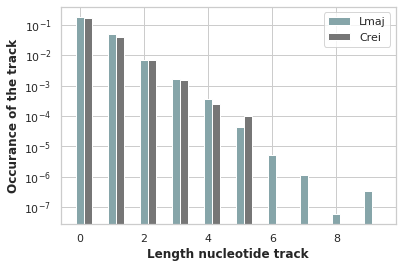

-------
C


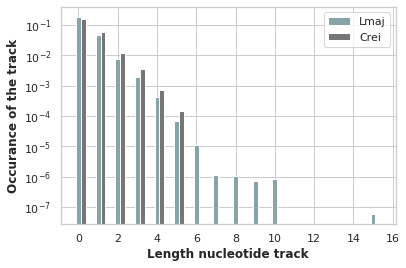

-------
T


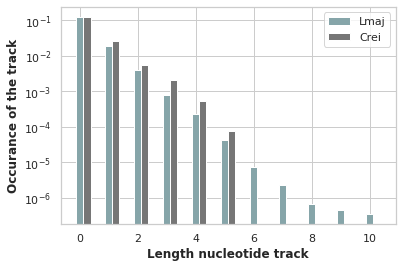

-------
A


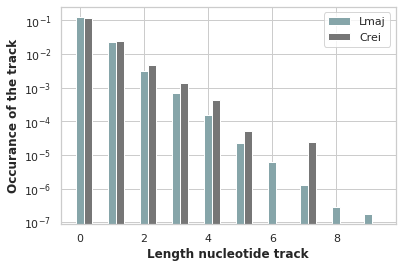

-------


In [72]:
dico = [dicoNegLmaj, dicoNegCrei]
maxTrack = {}
for nucl in dico[1]:
    if nucl not in maxTrack:
        maxTrack[nucl] = 0
    for track in dico[0][nucl]:
        if len(track) > maxTrack[nucl]:
            maxTrack[nucl] = len(track)
    for track in dico[1][nucl]:
        if len(track) > maxTrack[nucl]:
            maxTrack[nucl] = len(track)
# print(maxTrack)

barsLmaj = {}
barsCrei = {}
for nucl in maxTrack:
    barsLmaj[nucl] = [0] * maxTrack[nucl]
for nucl in maxTrack:
    barsCrei[nucl] = [0] * maxTrack[nucl]

for nucl in dico[0]:
    for track in dico[0][nucl]:
        barsLmaj[nucl][len(track)-1] = dico[0][nucl][track]
    for track in dico[1][nucl]:
        barsCrei[nucl][len(track)-1] = dico[1][nucl][track]

for nt in barsTthe:
    print(nt)
    sns.set(style="whitegrid")
    # set width of bar
    barWidth = 0.25
    barLmaj = [i/17675213.0 for i in barsLmaj[nt]]
    barCrei = [i/(39889.0) for i in barsCrei[nt]]
        
    # Set position of bar on X axis
    r1 = np.arange(len(barLmaj))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, barLmaj, color='#86a5a9', width=barWidth, edgecolor='white', label='Lmaj')
    plt.bar(r2, barCrei, color='#767676', width=barWidth, edgecolor='white', label='Crei')

    # Add xticks on the middle of the group bars
    plt.yscale('log')
    plt.xlabel('Length nucleotide track', fontweight='bold')
    plt.ylabel('Occurance of the track', fontweight='bold')

    # Create legend & Show graphic
    plt.legend()
    plt.show()
    print('-------')

## GC content by chr

In [80]:
def readGeneSeqByChr(filename):
    length = {}
    dicoChr = {}
    dicoNt = {'G': {}, 'C': {}, 'T': {}, 'A': {}}
    fastaOrigin = SeqIO.parse(open(filename),'fasta')
    for fasta in fastaOrigin:
        name, seq = fasta.id, str(fasta.seq)
        seq = seq.upper()
        chrm = name.split(':')[2]
        if chrm not in dicoChr:
            dicoChr[chrm] = dicoNt
        if chrm not in length:
            length[chrm] = []
        length[chrm].append(len(seq))
        for nucl in dicoChr[chrm]:
            listNucl = re.findall("("+nucl+"{1,})", seq)
            listNucl = list(filter(None, listNucl))
            listNucl = Counter(listNucl)
            for item in listNucl:
                if item not in dicoChr[chrm][nucl]:
                    dicoChr[chrm][nucl][item] = 0
                dicoChr[chrm][nucl][item] += listNucl[item]
    for chrm in length:
        print(chrm)
        print(len(length[chrm]))
        print(sum(length[chrm]))
        sns.boxplot(y=length[chrm], color="#E64E46" )
        plt.show()
    return dicoChr

10029
16185518


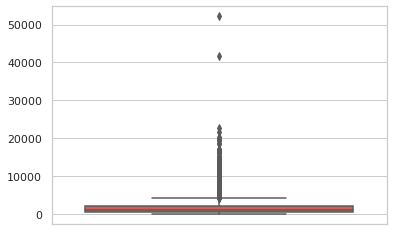

{'G': {'GGG': 124444,
  'GG': 828880,
  'G': 2894343,
  'GGGG': 30783,
  'GGGGG': 7025,
  'GGGGGG': 1014,
  'GGGGGGG': 162,
  'GGGGGGGG': 29,
  'GGGGGGGGG': 5,
  'GGGGGGGGGGGGGGGGGG': 2,
  'GGGGGGGGGGGGGGGGGGGGG': 1,
  'GGGGGGGGGGG': 3,
  'GGGGGGGGGG': 5,
  'GGGGGGGGGGGGGG': 1,
  'GGGGGGGGGGGGG': 1},
 'C': {'C': 2963623,
  'CC': 739092,
  'CCC': 126181,
  'CCCC': 34388,
  'CCCCC': 7753,
  'CCCCCC': 1400,
  'CCCCCCC': 207,
  'CCCCCCCC': 51,
  'CCCCCCCCCCC': 13,
  'CCCCCCCCC': 34,
  'CCCCCCCCCC': 26,
  'CCCCCCCCCCCCCCCCC': 1,
  'CCCCCCCCCCCCCCCC': 2,
  'CCCCCCCCCCCC': 2,
  'CCCCCCCCCCCCC': 1,
  'CCCCCCCCCCCCCCCCCCCC': 1},
 'T': {'T': 2011095,
  'TT': 324669,
  'TTTT': 14676,
  'TTT': 71852,
  'TTTTT': 3947,
  'TTTTTT': 840,
  'TTTTTTTT': 59,
  'TTTTTTTTTT': 11,
  'TTTTTTT': 207,
  'TTTTTTTTT': 72,
  'TTTTTTTTTTT': 6,
  'TTTTTTTTTTTTT': 2,
  'TTTTTTTTTTTT': 2},
 'A': {'A': 2082913,
  'AAA': 57547,
  'AA': 398209,
  'AAAA': 13061,
  'AAAAA': 3141,
  'AAAAAAA': 124,
  'AAAAAA': 503,
  'AAAA

In [84]:
readGeneSeq('/home/anais/Documents/Projet/G4Conservation/data/leishmania_major/Sequences_Gene_WT.fa', 'track')
#Lmaj mean gene length = 1613

17668
93535145


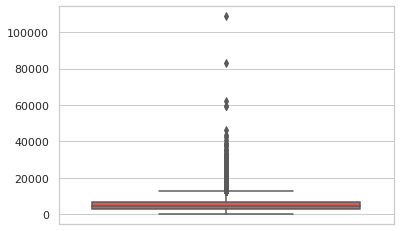

{'G': {'G': 14562822,
  'GG': 5122624,
  'GGGGG': 145471,
  'GGG': 1323105,
  'GGGG': 427913,
  'GGGGGG': 38530,
  'GGGGGGG': 10793,
  'GGGGGGGG': 3613,
  'GGGGGGGGGG': 2588,
  'GGGGGGGGGGGG': 1360,
  'GGGGGGGGGGGGG': 792,
  'GGGGGGGGG': 3366,
  'GGGGGGGGGGGGGGG': 258,
  'GGGGGGGGGGG': 1951,
  'GGGGGGGGGGGGGGGGGGGGG': 3,
  'GGGGGGGGGGGGGG': 454,
  'GGGGGGGGGGGGGGGG': 128,
  'GGGGGGGGGGGGGGGGG': 69,
  'GGGGGGGGGGGGGGGGGGGG': 5,
  'GGGGGGGGGGGGGGGGGGG': 13,
  'GGGGGGGGGGGGGGGGGG': 25,
  'GGGGGGGGGGGGGGGGGGGGGG': 3,
  'GGGGGGGGGGGGGGGGGGGGGGGGG': 1,
  'GGGGGGGGGGGGGGGGGGGGGGG': 3},
 'C': {'C': 14947852,
  'CC': 4129183,
  'CCC': 984656,
  'CCCC': 309930,
  'CCCCC': 96193,
  'CCCCCC': 26650,
  'CCCCCCCC': 2236,
  'CCCCCCC': 6869,
  'CCCCCCCCCC': 1787,
  'CCCCCCCCCCC': 1333,
  'CCCCCCCCC': 2086,
  'CCCCCCCCCCCC': 896,
  'CCCCCCCCCCCCCCC': 167,
  'CCCCCCCCCCCCC': 561,
  'CCCCCCCCCCCCCC': 353,
  'CCCCCCCCCCCCCCCC': 96,
  'CCCCCCCCCCCCCCCCC': 50,
  'CCCCCCCCCCCCCCCCCC': 21,
  'CCCCCCCCCCCCCCCC

In [85]:
readGeneSeq('/home/anais/Documents/Projet/G4Conservation/data/chlamydomonas_reinhardtii/Sequences_Gene_WT.fa', 'track')
#Crei global gene length = 5294

9
194
309556


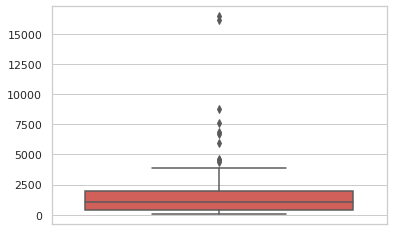

6
136
291805


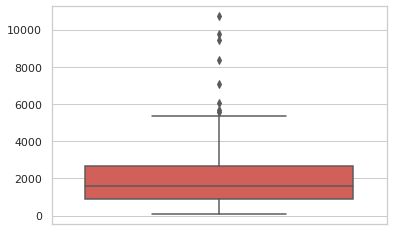

16
178
388150


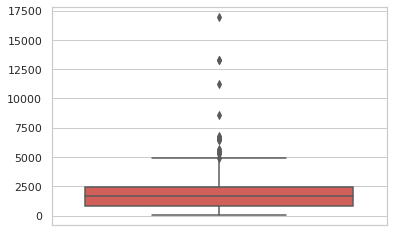

15
215
354262


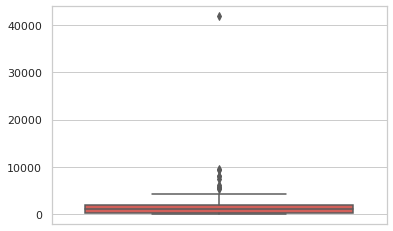

10
155
271284


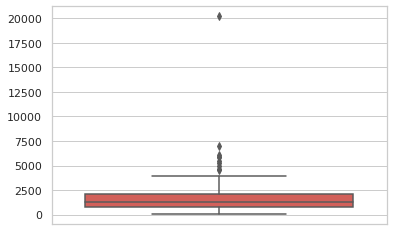

12
143
295117


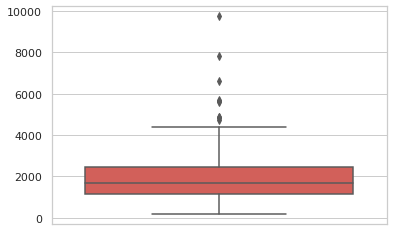

23
255
363237


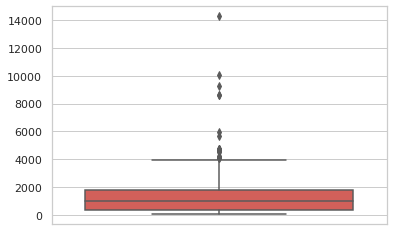

34
511
864530


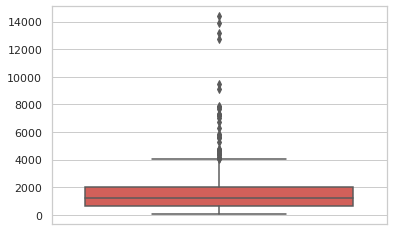


5
7032


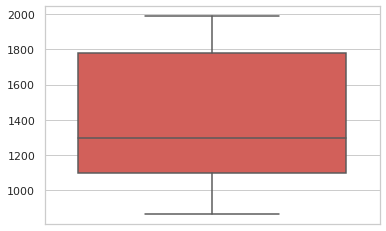

14
160
302413


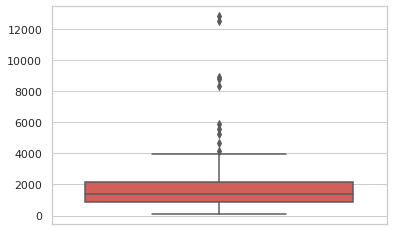

30
423
636408


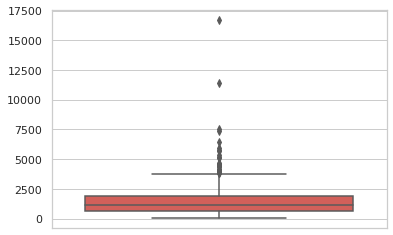

13
170
352696


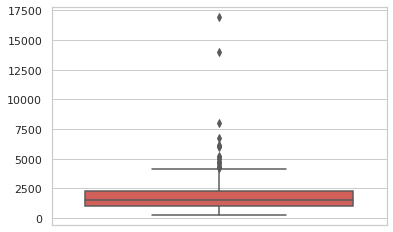

32
428
748284


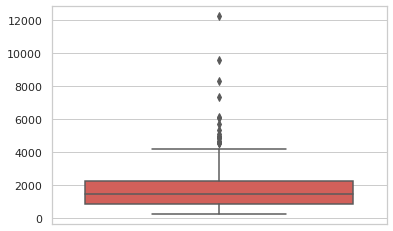

3
98
235918


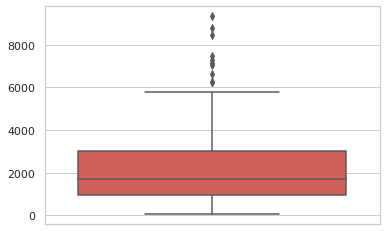

4
130
259984


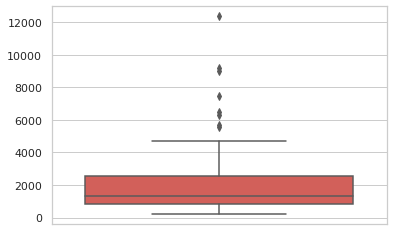

31
355
655858


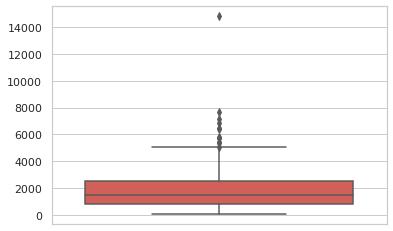

36
806
1295662


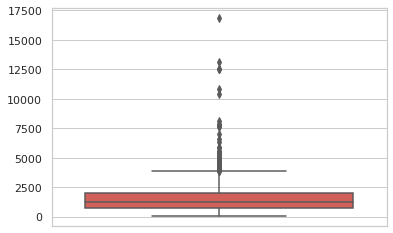

18
267
327166


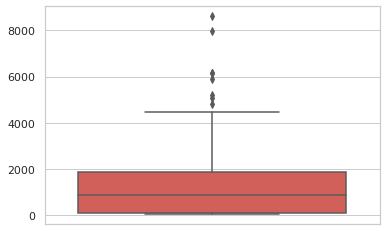

33
469
729094


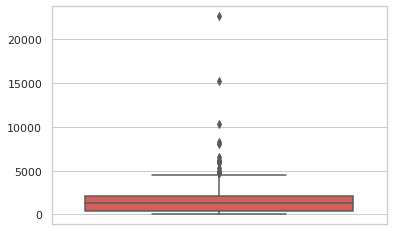

7
131
322498


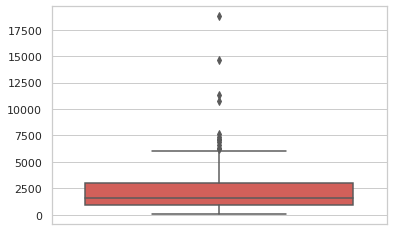

19
181
321463


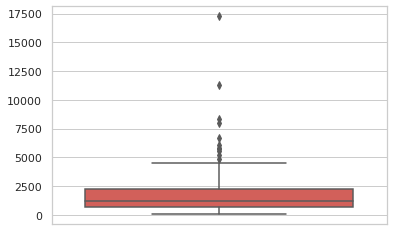

21
239
397689


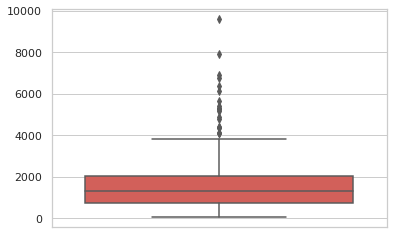

27
463
611934


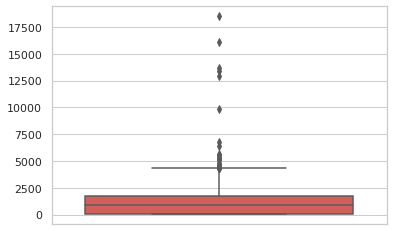

17
165
357468


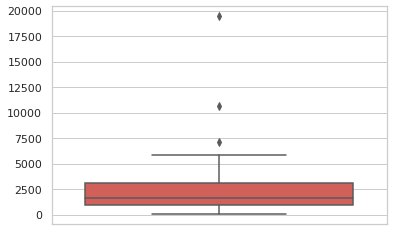

8
137
252332


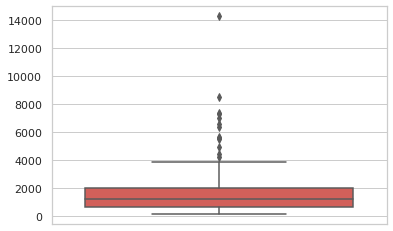

29
304
542738


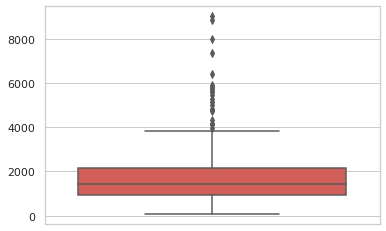

24
253
456975


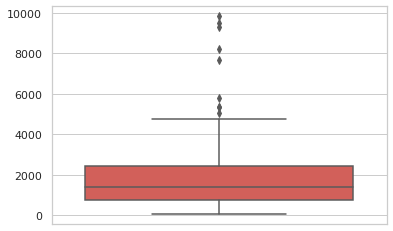

2
137
209536


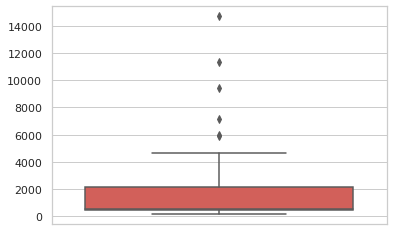

28
319
550256


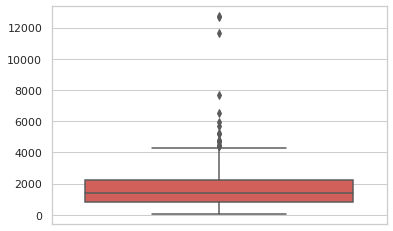

1
85
141923


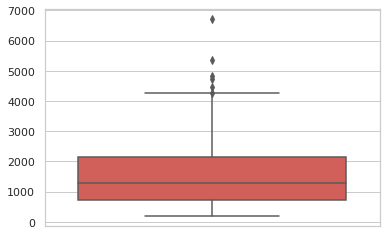

5
188
259425


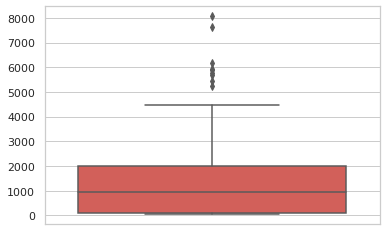

35
628
989552


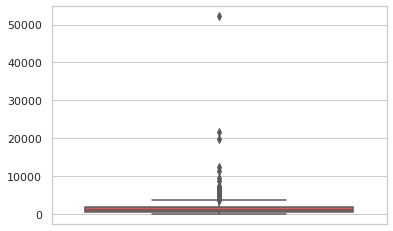

11
158
268418


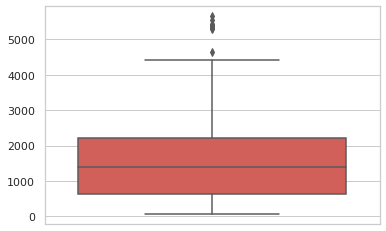

20
353
390024


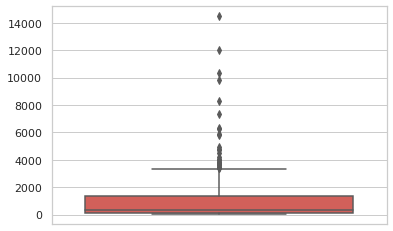

26
615
595944


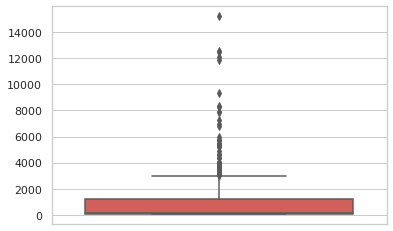

25
379
480360


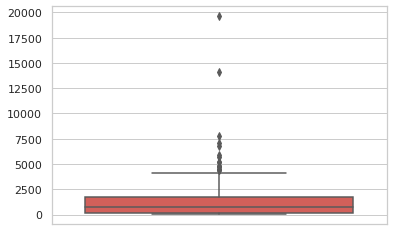

22
196
348527


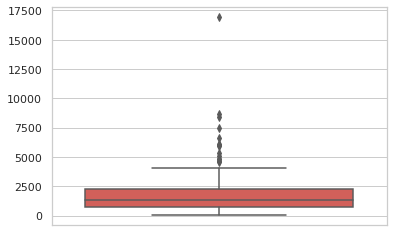

{'': {'A': {'A': 2082913,
            'AA': 398209,
            'AAA': 57547,
            'AAAA': 13061,
            'AAAAA': 3141,
            'AAAAAA': 503,
            'AAAAAAA': 124,
            'AAAAAAAA': 30,
            'AAAAAAAAA': 8,
            'AAAAAAAAAA': 3,
            'AAAAAAAAAAA': 1},
      'C': {'C': 2963623,
            'CC': 739092,
            'CCC': 126181,
            'CCCC': 34388,
            'CCCCC': 7753,
            'CCCCCC': 1400,
            'CCCCCCC': 207,
            'CCCCCCCC': 51,
            'CCCCCCCCC': 34,
            'CCCCCCCCCC': 26,
            'CCCCCCCCCCC': 13,
            'CCCCCCCCCCCC': 2,
            'CCCCCCCCCCCCC': 1,
            'CCCCCCCCCCCCCCCC': 2,
            'CCCCCCCCCCCCCCCCC': 1,
            'CCCCCCCCCCCCCCCCCCCC': 1},
      'G': {'G': 2894343,
            'GG': 828880,
            'GGG': 124444,
            'GGGG': 30783,
            'GGGGG': 7025,
            'GGGGGG': 1014,
            'GGGGGGG': 162,
            'GGGGGGGG': 29,

              'CCCCCCCCCCCCCCCCCCCC': 1},
        'G': {'G': 2894343,
              'GG': 828880,
              'GGG': 124444,
              'GGGG': 30783,
              'GGGGG': 7025,
              'GGGGGG': 1014,
              'GGGGGGG': 162,
              'GGGGGGGG': 29,
              'GGGGGGGGG': 5,
              'GGGGGGGGGG': 5,
              'GGGGGGGGGGG': 3,
              'GGGGGGGGGGGGG': 1,
              'GGGGGGGGGGGGGG': 1,
              'GGGGGGGGGGGGGGGGGG': 2,
              'GGGGGGGGGGGGGGGGGGGGG': 1},
        'T': {'T': 2011095,
              'TT': 324669,
              'TTT': 71852,
              'TTTT': 14676,
              'TTTTT': 3947,
              'TTTTTT': 840,
              'TTTTTTT': 207,
              'TTTTTTTT': 59,
              'TTTTTTTTT': 72,
              'TTTTTTTTTT': 11,
              'TTTTTTTTTTT': 6,
              'TTTTTTTTTTTT': 2,
              'TTTTTTTTTTTTT': 2}},
 '25': {'A': {'A': 2082913,
              'AA': 398209,
              'AAA': 57547,
  

             'GG': 828880,
             'GGG': 124444,
             'GGGG': 30783,
             'GGGGG': 7025,
             'GGGGGG': 1014,
             'GGGGGGG': 162,
             'GGGGGGGG': 29,
             'GGGGGGGGG': 5,
             'GGGGGGGGGG': 5,
             'GGGGGGGGGGG': 3,
             'GGGGGGGGGGGGG': 1,
             'GGGGGGGGGGGGGG': 1,
             'GGGGGGGGGGGGGGGGGG': 2,
             'GGGGGGGGGGGGGGGGGGGGG': 1},
       'T': {'T': 2011095,
             'TT': 324669,
             'TTT': 71852,
             'TTTT': 14676,
             'TTTTT': 3947,
             'TTTTTT': 840,
             'TTTTTTT': 207,
             'TTTTTTTT': 59,
             'TTTTTTTTT': 72,
             'TTTTTTTTTT': 11,
             'TTTTTTTTTTT': 6,
             'TTTTTTTTTTTT': 2,
             'TTTTTTTTTTTTT': 2}},
 '6': {'A': {'A': 2082913,
             'AA': 398209,
             'AAA': 57547,
             'AAAA': 13061,
             'AAAAA': 3141,
             'AAAAAA': 503,
             'AAAA

In [81]:
dicoLmaj = readGeneSeqByChr('/home/anais/Documents/Projet/G4Conservation/data/leishmania_major/Sequences_Gene_WT.fa')
pprint(dicoLmaj)

# ShortNC

In [10]:
dfShortNC = pd.DataFrame()
dfShortNC = dfShortNC.append(dfNonCoding[dfNonCoding.Class == 'ShortNC'])
dfShortNC['ShortName'] = dfShortNC.Sp.apply(applyShortName)
dfShortNC['Group'] = dfShortNC.Sp.apply(getGrp)

dfShortNC.head()

NameError: name 'getGrp' is not defined